In [3]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [57]:
def plot_training_loss(data, epoch_batches, title, type="Training", tick_interval=100, baseline=False, average=False):
    colors = sns.color_palette("husl", 2)
    sns.set(style="darkgrid")
    plt.figure(figsize=(12, 6))

    xs = [d[0] for d in data]
    data_points = [d[1] for d in data]

    plt.plot(xs, data_points, color=colors[0], label=f"{type} {title}")

    window_size = 2
    padded_data = np.pad(data_points, (window_size // 2, window_size - 1 - window_size // 2), mode='edge')
    moving_average = np.convolve(padded_data, np.ones(window_size) / window_size, mode='valid')
    x_range = np.linspace(xs[0], xs[-1], len(moving_average))
    plt.plot(x_range, moving_average, color=colors[1], label='Moving Average')

    plt.title(f"{type} {title} per Batch")
    plt.xlabel('Batch Number')
    plt.ylabel('Score')
    plt.tick_params(axis='both', which='major', labelsize=12)

    if baseline:
        plt.axhline(y=0.9844, color='r', linestyle='--', label='Blank Baseline (0.9844)')
    if average:
        avg_loss = round(sum(data_points) / len(data_points), 4)
        plt.axhline(y=avg_loss, color='b', linestyle='--', label=f'Average Loss ({avg_loss})')

    for epoch in epoch_batches:
        plt.axvline(x=epoch, linestyle='dotted', color='black')

    plt.legend()
    plt.tight_layout(pad=3)
    plt.show()


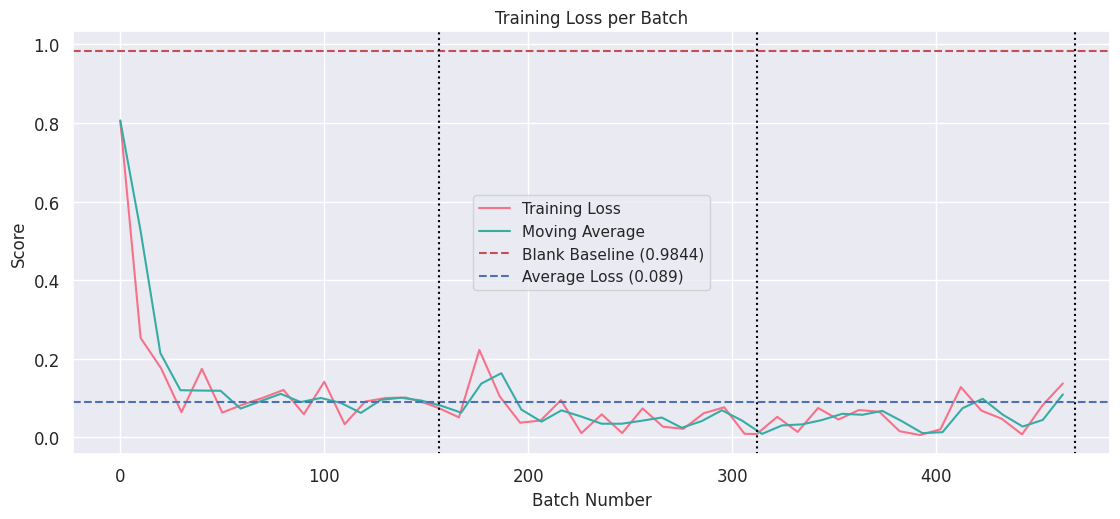

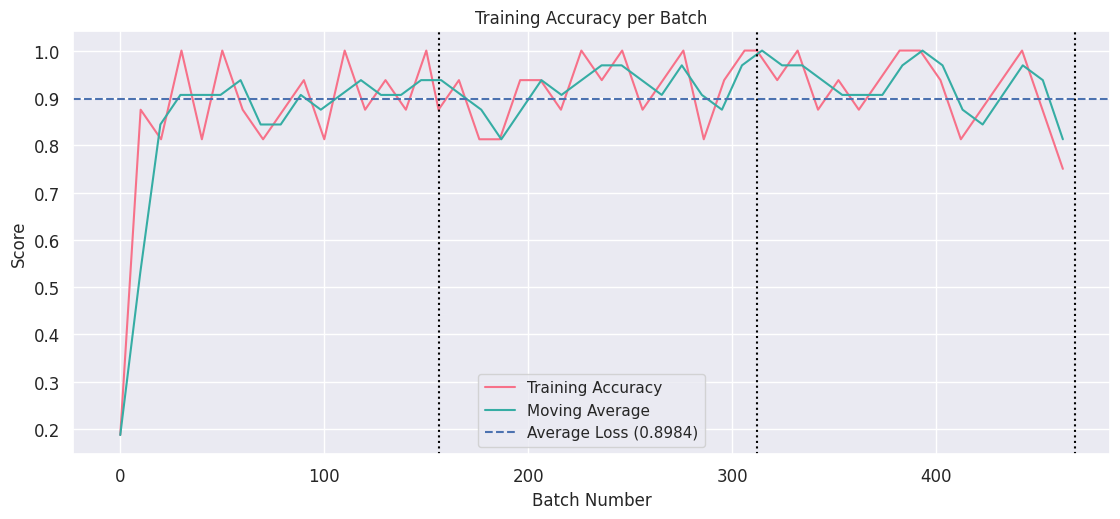

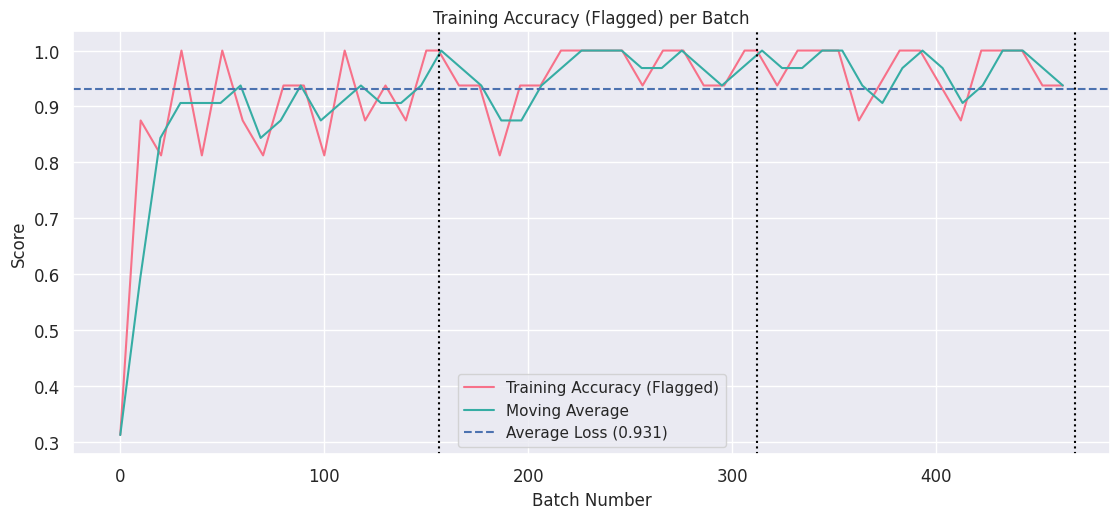

In [87]:
json_path = '/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/saved/ALBERT-Clean/lightning_logs/version_3/checkpoints/train_metrics.json'
with open(json_path, 'r') as f:
    data = json.load(f)
plot_training_loss(data['loss'], data["epoch_batch_count"], "Loss", baseline=True, average=True)
plot_training_loss(data['acc'], data["epoch_batch_count"], "Accuracy", average=True)
plot_training_loss(data['acc_flag'], data["epoch_batch_count"], "Accuracy (Flagged)", average=True)


In [94]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_val_loss(data, epoch_batches, title, tick_interval=10):
    colors = sns.color_palette("husl", len(data))
    sns.set(style="darkgrid")
    plt.figure(figsize=(12, 6))

    xs = [d[0] for d in list(data.values())[0]]

    for i, (label, d) in enumerate(data.items()):
        plt.plot(xs, [data[1] for data in d], color=colors[i], label=f"Validation {label}")

    for epoch in epoch_batches:
        plt.axvline(x=epoch, linestyle='dotted', color='black')

    plt.title(f'Validation {title} per Batch')
    plt.xlabel('Batch Number')
    plt.ylabel('Score')
    plt.tick_params(axis='both', which='major', labelsize=12)

    plt.legend()
    plt.tight_layout(pad=3)
    plt.show()


In [95]:
json_path = '/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/saved/ALBERT-Clean/lightning_logs/version_3/checkpoints/val_metrics.json'
with open(json_path, 'r') as f:
    data = json.load(f)
metric_sub_data = {
    "Recall": data["recall"],
    "Precision": data["precision"],
    "F1": data["f1"],
}

classes = list(data["auc"][0]['class_auc'].keys())
auc_sub_data = {
    c: [(d['batch_idx'], d['class_auc'][c]) for d in data["auc"]] for c in classes
}
auc_data = [(d['batch_idx'], d['mean_auc']) for d in data['auc']]

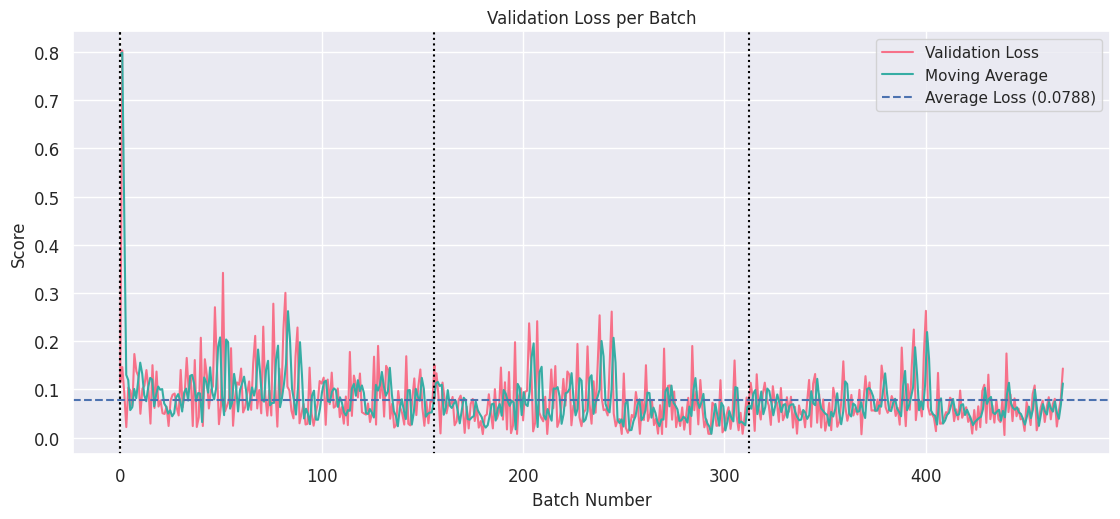

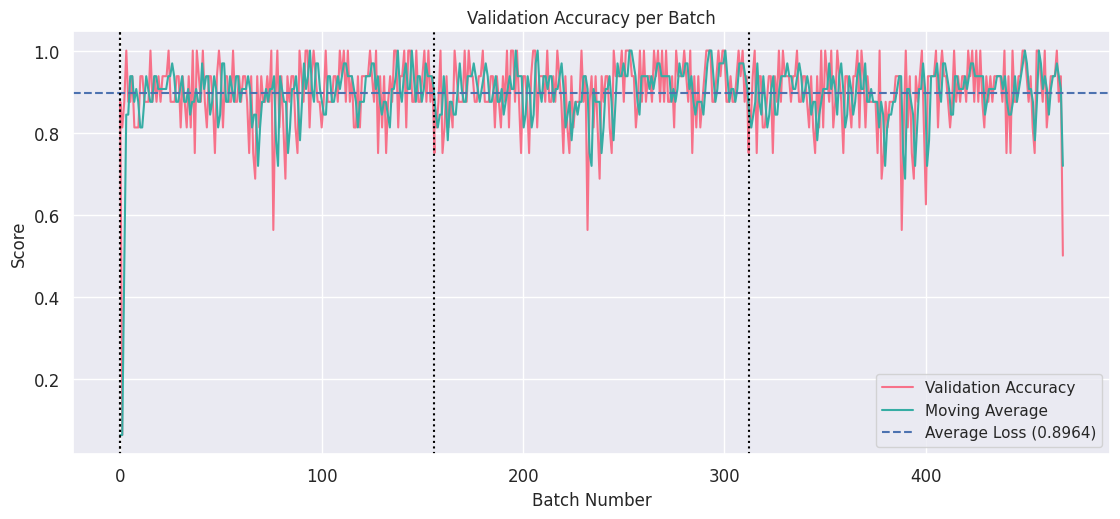

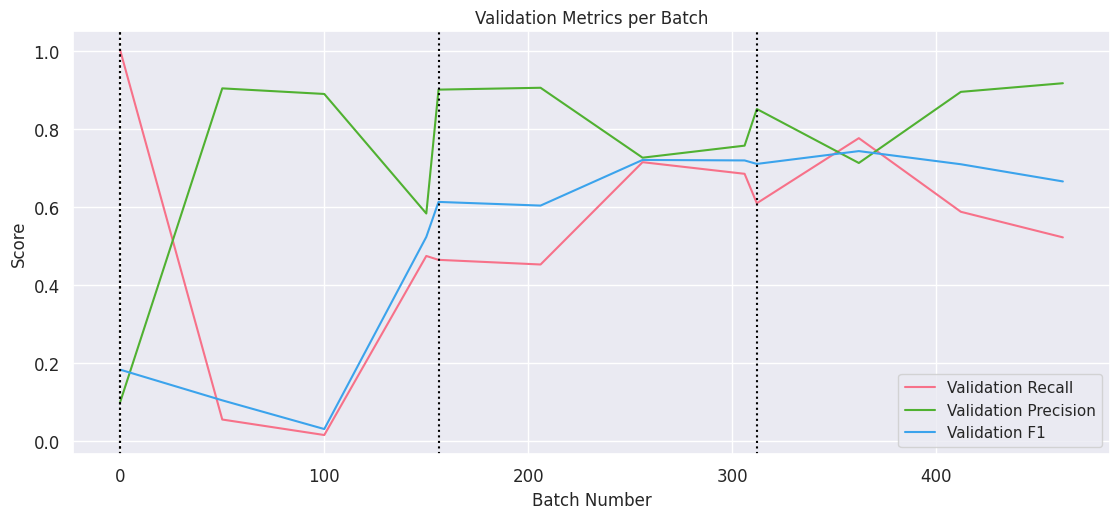

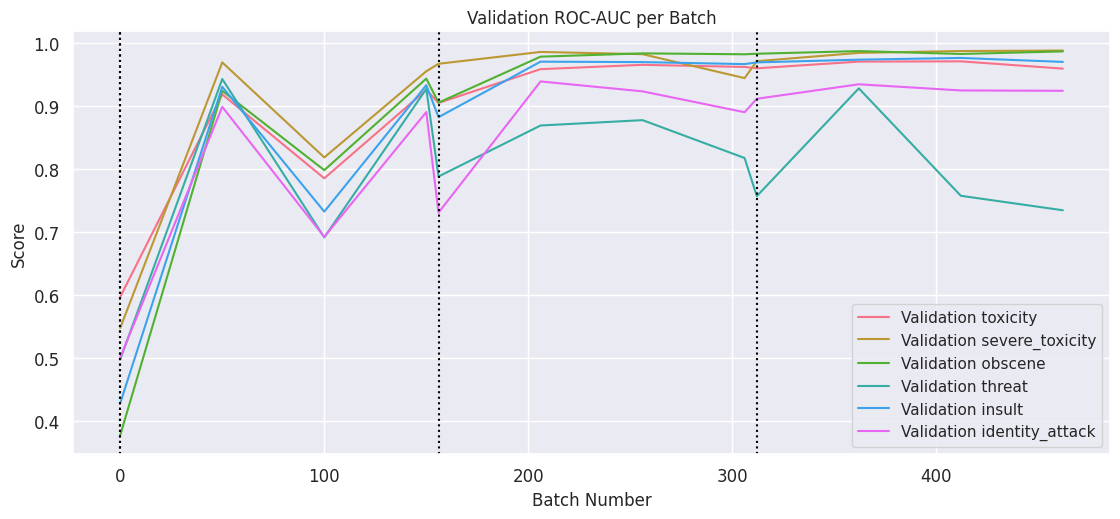

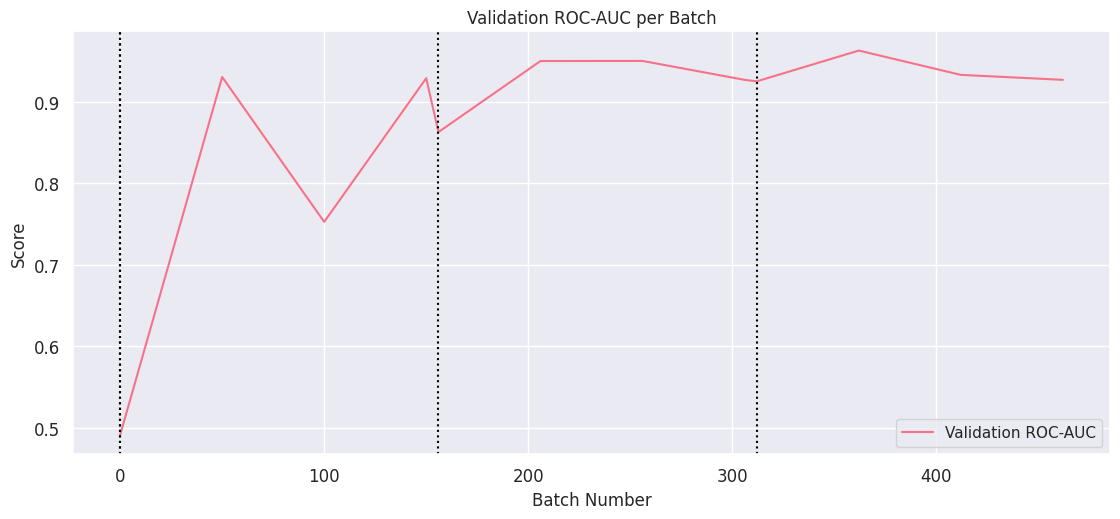

[0, 0, 156, 312]


In [96]:
plot_training_loss(data['loss'], data["epoch_batch_count"], "Loss", type="Validation", tick_interval=10, average=True)

plot_training_loss(data['acc'], data["epoch_batch_count"], "Accuracy", type="Validation", tick_interval=10, average=True)

plot_val_loss(metric_sub_data, data['epoch_batch_count'], "Metrics")

plot_val_loss(auc_sub_data, data['epoch_batch_count'], "ROC-AUC")

plot_val_loss({"ROC-AUC": auc_data}, data['epoch_batch_count'], "ROC-AUC")
print(data['epoch_batch_count'])